# Random sampling

Oftentimes we need random samples. For some applications (such as emulation), we want random samples distributed across the extend of a distribution but without following the distribution itself. Traditionally, if one wants to sample from a distribtuion, one would compute the cumulative distribution function, invert it, draw from the uniform distribution $x\sim{\it U}[0,1)$ and project onto the iCDF. 

This is **not** what we need to do for making training points for emulators. In that application, we want our training points to *span* the distribution, but not follow the peaks. One way to achieve this for a multivariate normal distribution is the following:
1) Obtain the covariance matrix from the distribution. This is either obtained immediately if we can write down the distribution, or we can calculate the sample covariance from, say, an MCMC chain.
2) Compute the eigenvalues $\lambda$ and eigenvectors of the covariance matrix. The eigenvectors, taken together, form a rotation matrix $R$ that rotates points to/from the basis that diagonalizes the covariance.
3) Draw a uniform random sample ${\bf x}$ in the same number of dimensions as the distribution.
4) Transform the samples into the basis of the covariance ${\bf x}_R = s{\bf \lambda}\cdot R {\bf x}$, where $s$ is a scale factor that can stretch the points to an arbitrary extent. For instance, if $s=1$, the points will lie within the 1$\sigma$ contours of the distribution. If $s=3$, it will lie in the 3$\sigma$ region.

This notebook demonstrates the use of the `SampleGenerator` tool from the `sample_generator` package. We show how one can draw from a flat uniform distribution, circular uniform distribution, and a LHMDU (latin hypercube with multidimensional uniformity) distribution.

We show some interesting properties, such as how using a flat distribution results in a stretched unit square appearing in the transformed space. Since the example is in 2D, the flat and LHMDU distributions look similar.

In [1]:
import numpy as np
import sample_generator as sg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Formatting
plt.rc("font", size=18, family="serif")
plt.rc("text", usetex=True)

Text(0,0.5,'$P_2$')

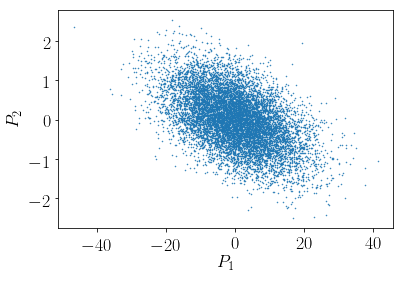

In [3]:
#Generate a fake MCMC chain sampled from a 2D Gaussian
means = np.array([0,0])
v1, v2 = 100., 0.5
rho = -0.5
Sigma = np.array([[v1, rho*np.sqrt(v1*v2)], 
                  [rho*np.sqrt(v1*v2), v2]])
N = 10000
chain = np.random.multivariate_normal(means, Sigma, N)
cov = np.cov(chain.T)
w, R = np.linalg.eig(cov)
plt.scatter(chain[:,0], chain[:,1], marker='.', s=1)
plt.xlabel(r"$P_1$")
plt.ylabel(r"$P_2$")

In [4]:
#Create a SampleGenerator object from the chain
Generator = sg.SampleGenerator(chain=chain, scale=5)

## Flat uniform samples

Below, we draw samples from the generator based on the flat uniform distribution. We see that the points clearly appear in a square that is stretched across the distribution.

Text(0,0.5,'$P_2$')

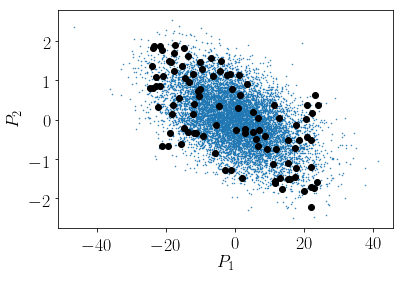

In [5]:
Nsamples = 100
x = Generator.get_samples(Nsamples, "flat")
plt.scatter(chain[:,0], chain[:,1], marker='.', s=1)
plt.scatter(x[:,0], x[:,1], c='k')
plt.xlabel(r"$P_1$")
plt.ylabel(r"$P_2$")

## Flat circular distribution

Here we draw from a flat circular distribution, which then transforms to an ellipse that is oriented with the underlying distribution.

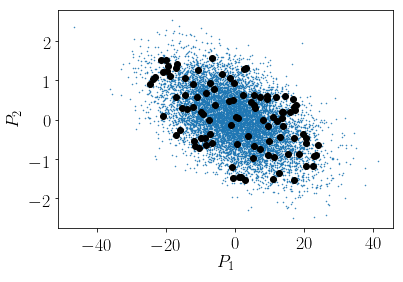

In [6]:
x = Generator.get_samples(Nsamples, "circular")
plt.scatter(chain[:,0], chain[:,1], marker='.', s=1)
plt.scatter(x[:,0], x[:,1], c='k')
plt.xlabel(r"$P_1$")
plt.ylabel(r"$P_2$")
plt.savefig("basic_latinhypersphere.png", dpi=300, bbox_inches="tight")

## Latin hypercube with multidimensional uniformity

The below example is much slower, but the points (including in high dimensions) follow a latin hypercube. Thus, they span the space a bit better than the flat distribution. This property is only really critical in higher dimensions or with very few points.

Text(0,0.5,'$P_2$')

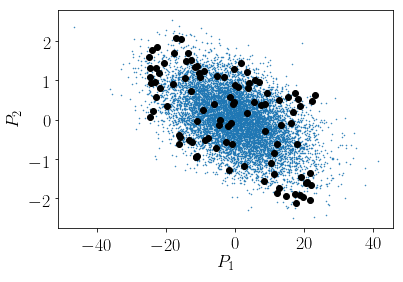

In [7]:
x = Generator.get_samples(Nsamples, "LHMDU")
plt.scatter(chain[:,0], chain[:,1], marker='.', s=1)
plt.scatter(x[:,0], x[:,1], c='k')
plt.xlabel(r"$P_1$")
plt.ylabel(r"$P_2$")